<a href="https://colab.research.google.com/github/resulpusat/Applicaton/blob/main/vize_234304024_resul_pusat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
sns.set()
%matplotlib inline


In [30]:
!git clone https://github.com/hardik0/AI-for-Medicine-Specialization
%cd AI-for-Medicine-Specialization/AI-for-Medical-Diagnosis/

Cloning into 'AI-for-Medicine-Specialization'...
remote: Enumerating objects: 1601, done.
remote: Counting objects: 100% (28/28), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 1601 (delta 9), reused 2 (delta 0), pack-reused 1573 (from 1)
Receiving objects: 100% (1601/1601), 720.36 MiB | 28.54 MiB/s, done.
Resolving deltas: 100% (30/30), done.
Updating files: 100% (1497/1497), done.
/content/AI-for-Medicine-Specialization/AI-for-Medical-Diagnosis/AI-for-Medicine-Specialization/AI-for-Medical-Diagnosis


In [49]:
train_df = pd.read_csv("nih//train-small.csv")
print(f"Toplam {train_df.shape[0]} satır ve {train_df.shape[1]} sütun bulunmaktadır.")
train_df.head()


Toplam 1000 satır ve 16 sütun bulunmaktadır.


,Image,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,Nodule,PatientId,Pleural_Thickening,Pneumonia,Pneumothorax
0,00008270_015.png,0,0,0,0,0,0,0,0,0,0,0,8270,0,0,0
1,00029855_001.png,1,0,0,0,1,0,0,0,1,0,0,29855,0,0,0
2,00001297_000.png,0,0,0,0,0,0,0,0,0,0,0,1297,1,0,0
3,00012359_002.png,0,0,0,0,0,0,0,0,0,0,0,12359,0,0,0
4,00017951_001.png,0,0,0,0,0,0,0,0,1,0,0,17951,0,0,0


In [32]:
train_df.info()
print(f"Benzersiz hasta sayısı: {train_df['PatientId'].nunique()}")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Image               1000 non-null   object
 1   Atelectasis         1000 non-null   int64 
 2   Cardiomegaly        1000 non-null   int64 
 3   Consolidation       1000 non-null   int64 
 4   Edema               1000 non-null   int64 
 5   Effusion            1000 non-null   int64 
 6   Emphysema           1000 non-null   int64 
 7   Fibrosis            1000 non-null   int64 
 8   Hernia              1000 non-null   int64 
 9   Infiltration        1000 non-null   int64 
 10  Mass                1000 non-null   int64 
 11  Nodule              1000 non-null   int64 
 12  PatientId           1000 non-null   int64 
 13  Pleural_Thickening  1000 non-null   int64 
 14  Pneumonia           1000 non-null   int64 
 15  Pneumothorax        1000 non-null   int64 
dtypes: int64(15), object(1)
m

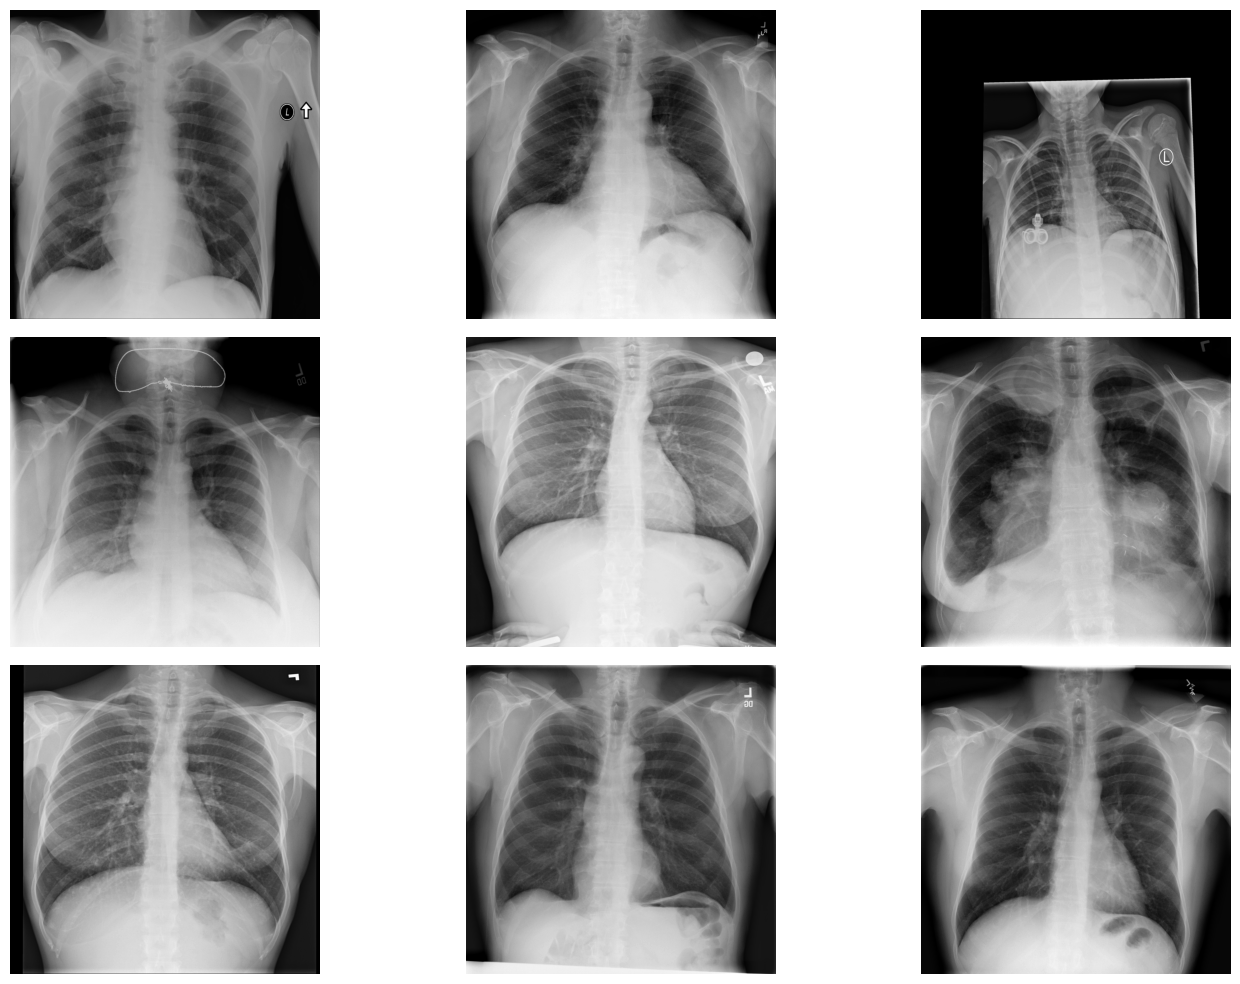

In [47]:
import matplotlib.pyplot as plt

images = train_df['Image'].values
random_images = [np.random.choice(images) for _ in range(9)]
img_dir = "nih/images_small/"
plt.figure(figsize=(15, 10))
for i, img_name in enumerate(random_images):
    plt.subplot(3, 3, i+1)
    img = plt.imread(os.path.join(img_dir, img_name))
    plt.imshow(img, cmap='gray')
    plt.axis('off')
plt.tight_layout()
plt.show()


In [34]:
for img_name in random_images:
    img = plt.imread(os.path.join(img_dir, img_name))
    print(f"Görüntü: {img_name}")
    print(f"Min: {img.min()}, Max: {img.max()}, Mean: {img.mean()}, Std: {img.std()}\n")


Görüntü: 00027260_017.png
Min: 0.0, Max: 1.0, Mean: 0.4349721074104309, Std: 0.2878989279270172

Görüntü: 00022458_008.png
Min: 0.0, Max: 1.0, Mean: 0.4166245758533478, Std: 0.19102296233177185

Görüntü: 00026171_005.png
Min: 0.0, Max: 1.0, Mean: 0.4084168076515198, Std: 0.1565689742565155

Görüntü: 00022883_003.png
Min: 0.0, Max: 1.0, Mean: 0.5318710207939148, Std: 0.17769205570220947

Görüntü: 00011049_003.png
Min: 0.0, Max: 0.9882352948188782, Mean: 0.46202757954597473, Std: 0.24517539143562317

Görüntü: 00027455_003.png
Min: 0.0, Max: 1.0, Mean: 0.5292267799377441, Std: 0.22774189710617065

Görüntü: 00001034_002.png
Min: 0.0, Max: 1.0, Mean: 0.6395684480667114, Std: 0.1930740773677826

Görüntü: 00004438_004.png
Min: 0.0, Max: 0.9882352948188782, Mean: 0.6464499235153198, Std: 0.19874894618988037

Görüntü: 00014768_002.png
Min: 0.0, Max: 1.0, Mean: 0.45691102743148804, Std: 0.2292725145816803



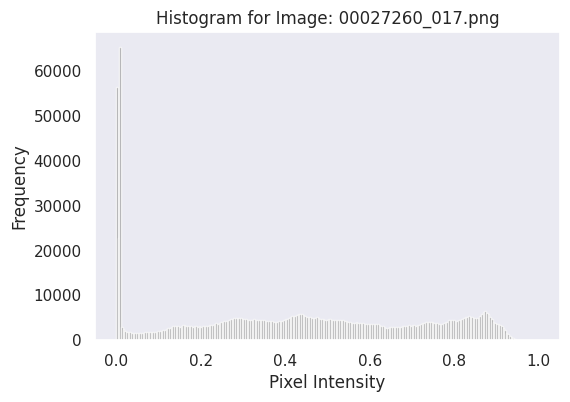

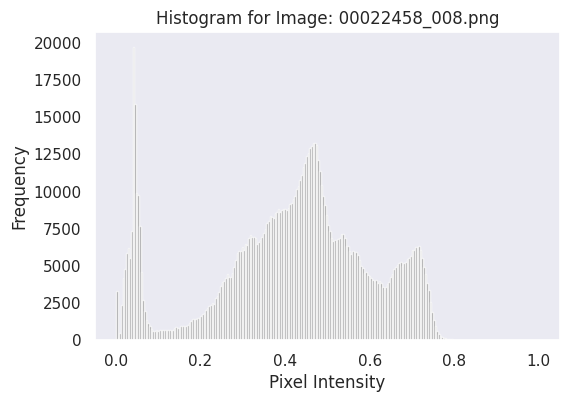

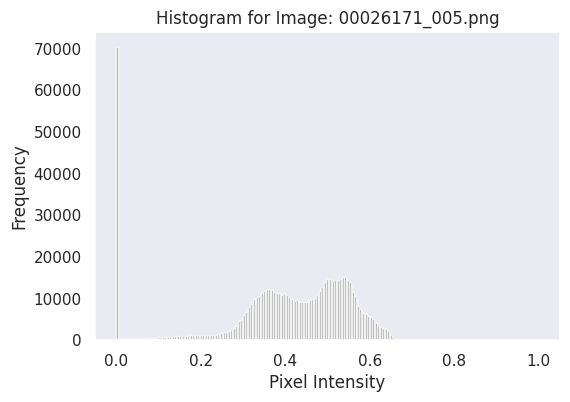

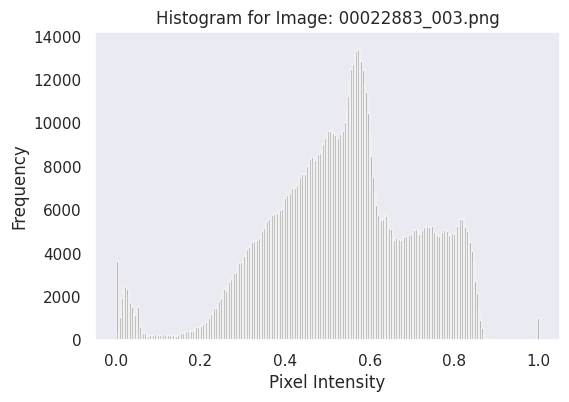

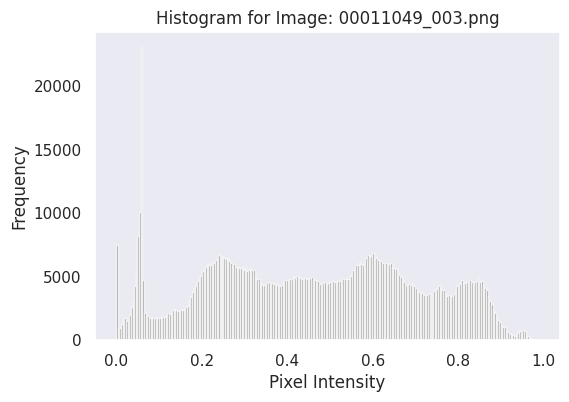

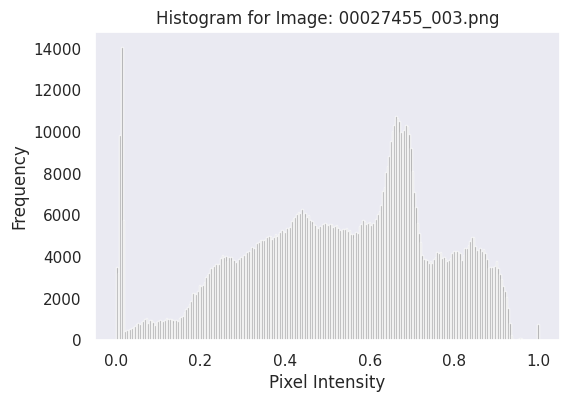

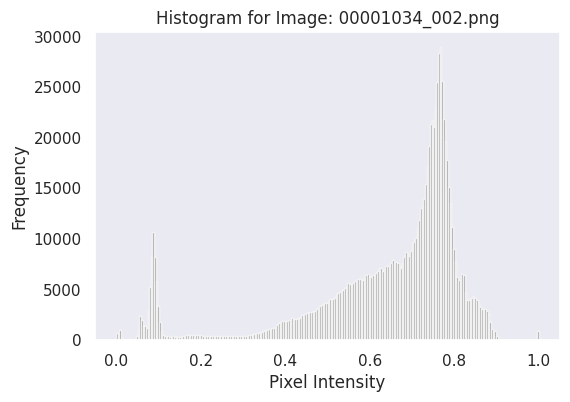

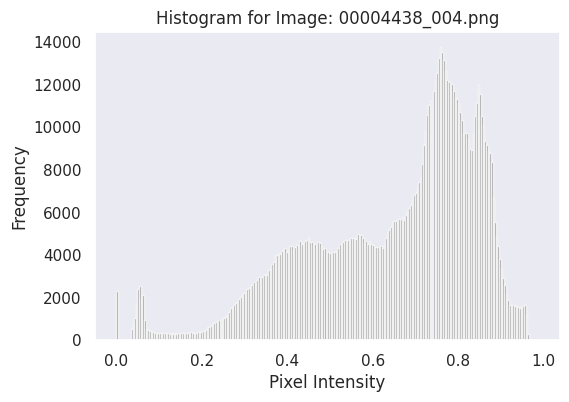

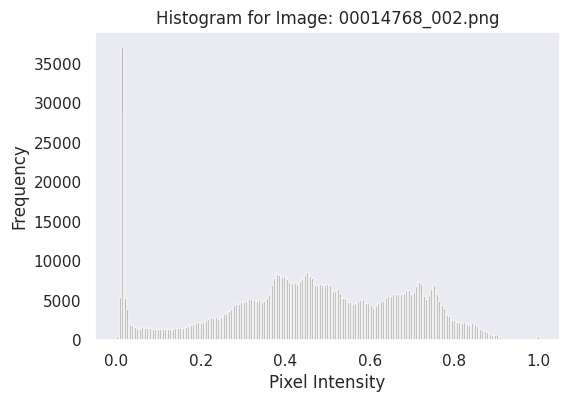

In [35]:
import matplotlib.pyplot as plt

for i, img_name in enumerate(random_images):
    img = plt.imread(os.path.join(img_dir, img_name))
    plt.figure(figsize=(6, 4))
    plt.hist(img.ravel(), bins=256, color='gray', alpha=0.75)
    plt.title(f'Histogram for Image: {img_name}')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.grid(False)
    plt.show()


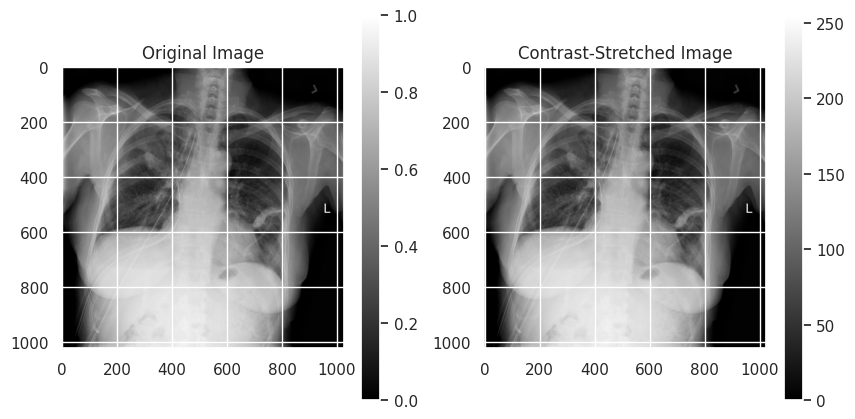

In [37]:
from skimage import exposure
import numpy as np
import matplotlib.pyplot as plt

sample_img = plt.imread(os.path.join(img_dir, random_images[0]))

min_val, max_val = sample_img.min(), sample_img.max()

contrast_stretched = (sample_img - min_val) / (max_val - min_val)
contrast_stretched = (contrast_stretched * 255).astype(np.uint8)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(sample_img, cmap='gray')
plt.title("Original Image")
plt.colorbar()
plt.subplot(1, 2, 2)
plt.imshow(contrast_stretched, cmap='gray')
plt.title("Contrast-Stretched Image")
plt.colorbar()
plt.show()


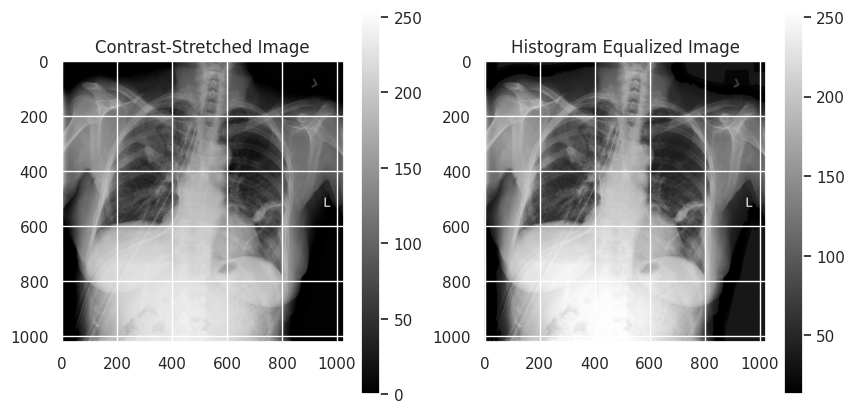

In [39]:
equalized_image = exposure.equalize_hist(contrast_stretched)
equalized_image = (equalized_image * 255).astype(np.uint8)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(contrast_stretched, cmap='gray')
plt.title("Contrast-Stretched Image")
plt.colorbar()
plt.subplot(1, 2, 2)
plt.imshow(equalized_image, cmap='gray')
plt.title("Histogram Equalized Image")
plt.colorbar()
plt.show()


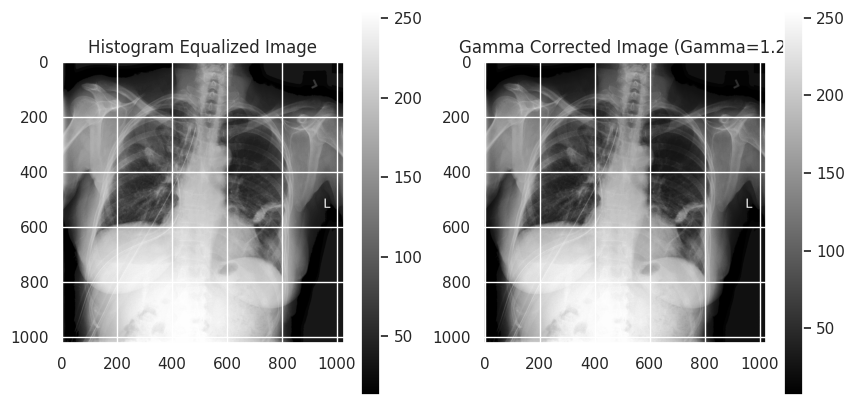

In [40]:
gamma = 1.2
gamma_corrected = np.power(equalized_image / 255.0, gamma) * 255
gamma_corrected = gamma_corrected.astype(np.uint8)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(equalized_image, cmap='gray')
plt.title("Histogram Equalized Image")
plt.colorbar()
plt.subplot(1, 2, 2)
plt.imshow(gamma_corrected, cmap='gray')
plt.title(f"Gamma Corrected Image (Gamma={gamma})")
plt.colorbar()
plt.show()


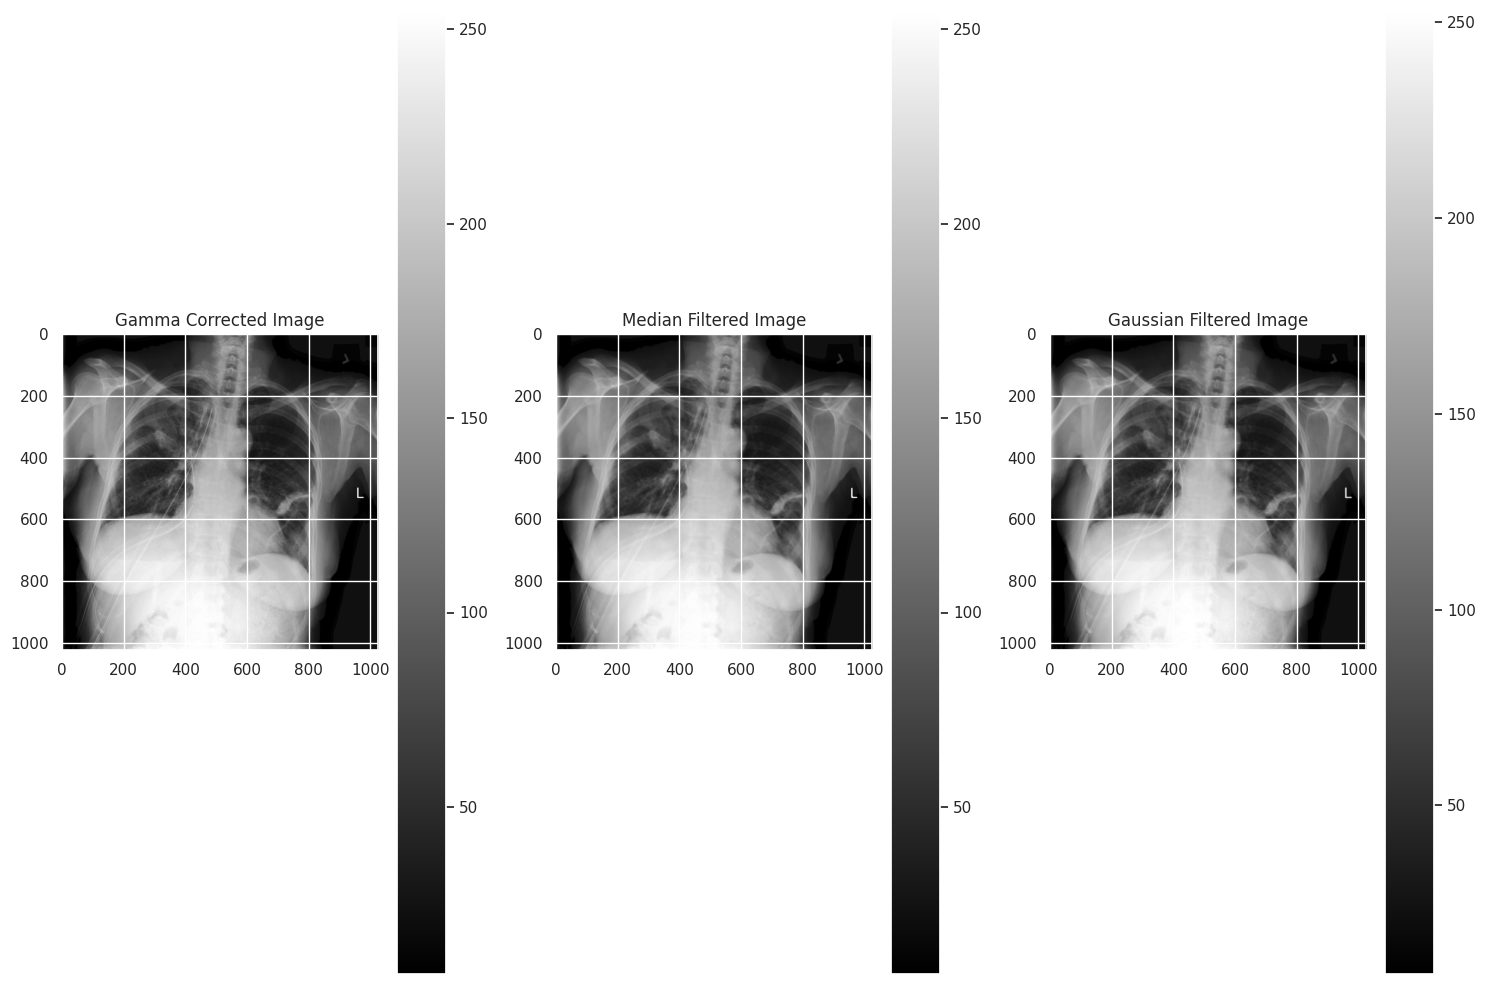

In [41]:
import cv2
import matplotlib.pyplot as plt

gamma_corrected = gamma_corrected

median_filtered = cv2.medianBlur(gamma_corrected, 5)

gaussian_filtered = cv2.GaussianBlur(gamma_corrected, (5, 5), 0)

plt.figure(figsize=(15, 10))

plt.subplot(1, 3, 1)
plt.imshow(gamma_corrected, cmap='gray')
plt.title("Gamma Corrected Image")
plt.colorbar()

plt.subplot(1, 3, 2)
plt.imshow(median_filtered, cmap='gray')
plt.title("Median Filtered Image")
plt.colorbar()

plt.subplot(1, 3, 3)
plt.imshow(gaussian_filtered, cmap='gray')
plt.title("Gaussian Filtered Image")
plt.colorbar()

plt.tight_layout()
plt.show()


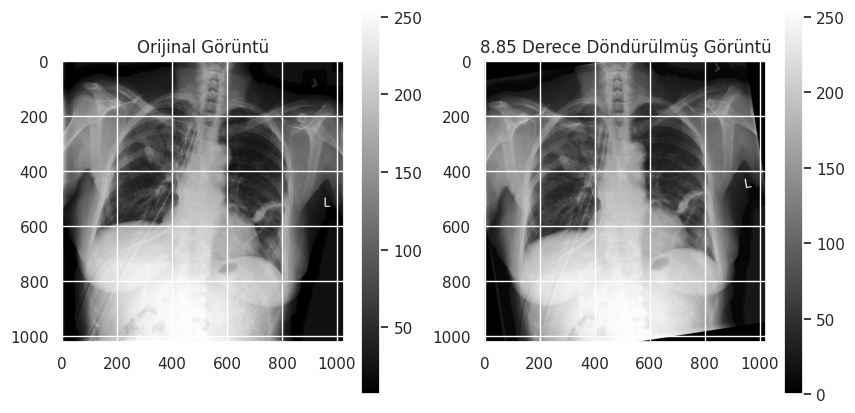

In [42]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = gamma_corrected

random_angle = np.random.uniform(0, 10)

(h, w) = image.shape
center = (w // 2, h // 2)

rotation_matrix = cv2.getRotationMatrix2D(center, random_angle, 1.0)

rotated_image = cv2.warpAffine(image, rotation_matrix, (w, h))

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Orijinal Görüntü")
plt.colorbar()
plt.subplot(1, 2, 2)
plt.imshow(rotated_image, cmap='gray')
plt.title(f"{random_angle:.2f} Derece Döndürülmüş Görüntü")
plt.colorbar()
plt.show()



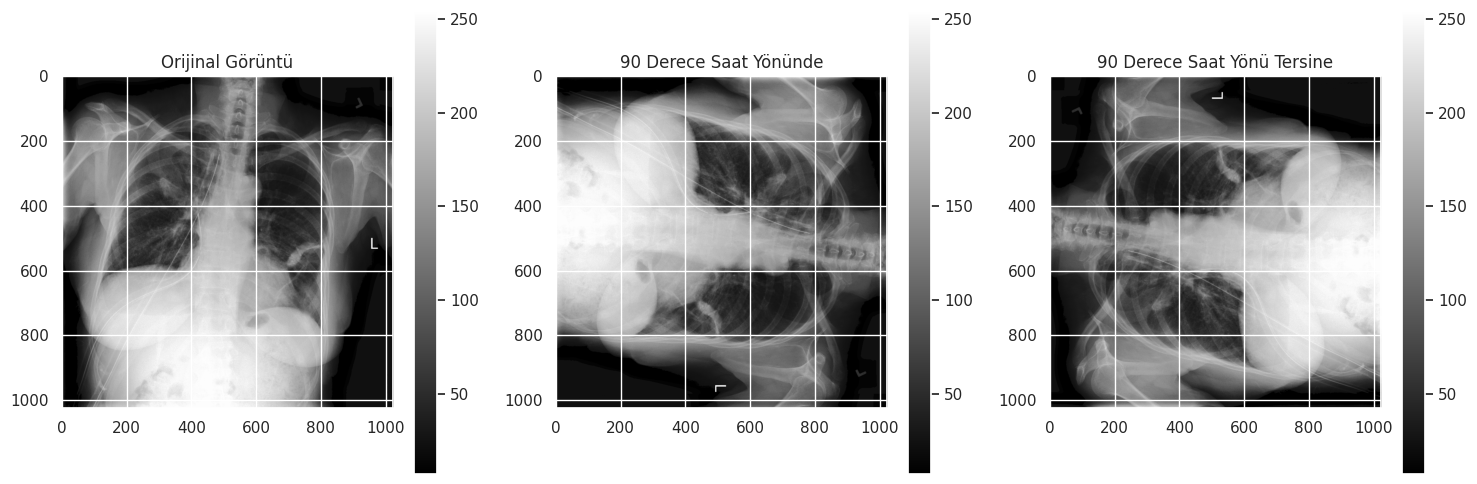

In [43]:
import cv2
import matplotlib.pyplot as plt

image = gamma_corrected

rotated_90_cw = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)

rotated_90_ccw = cv2.rotate(image, cv2.ROTATE_90_COUNTERCLOCKWISE)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title("Orijinal Görüntü")
plt.colorbar()

plt.subplot(1, 3, 2)
plt.imshow(rotated_90_cw, cmap='gray')
plt.title("90 Derece Saat Yönünde")
plt.colorbar()

plt.subplot(1, 3, 3)
plt.imshow(rotated_90_ccw, cmap='gray')
plt.title("90 Derece Saat Yönü Tersine")
plt.colorbar()

plt.tight_layout()
plt.show()





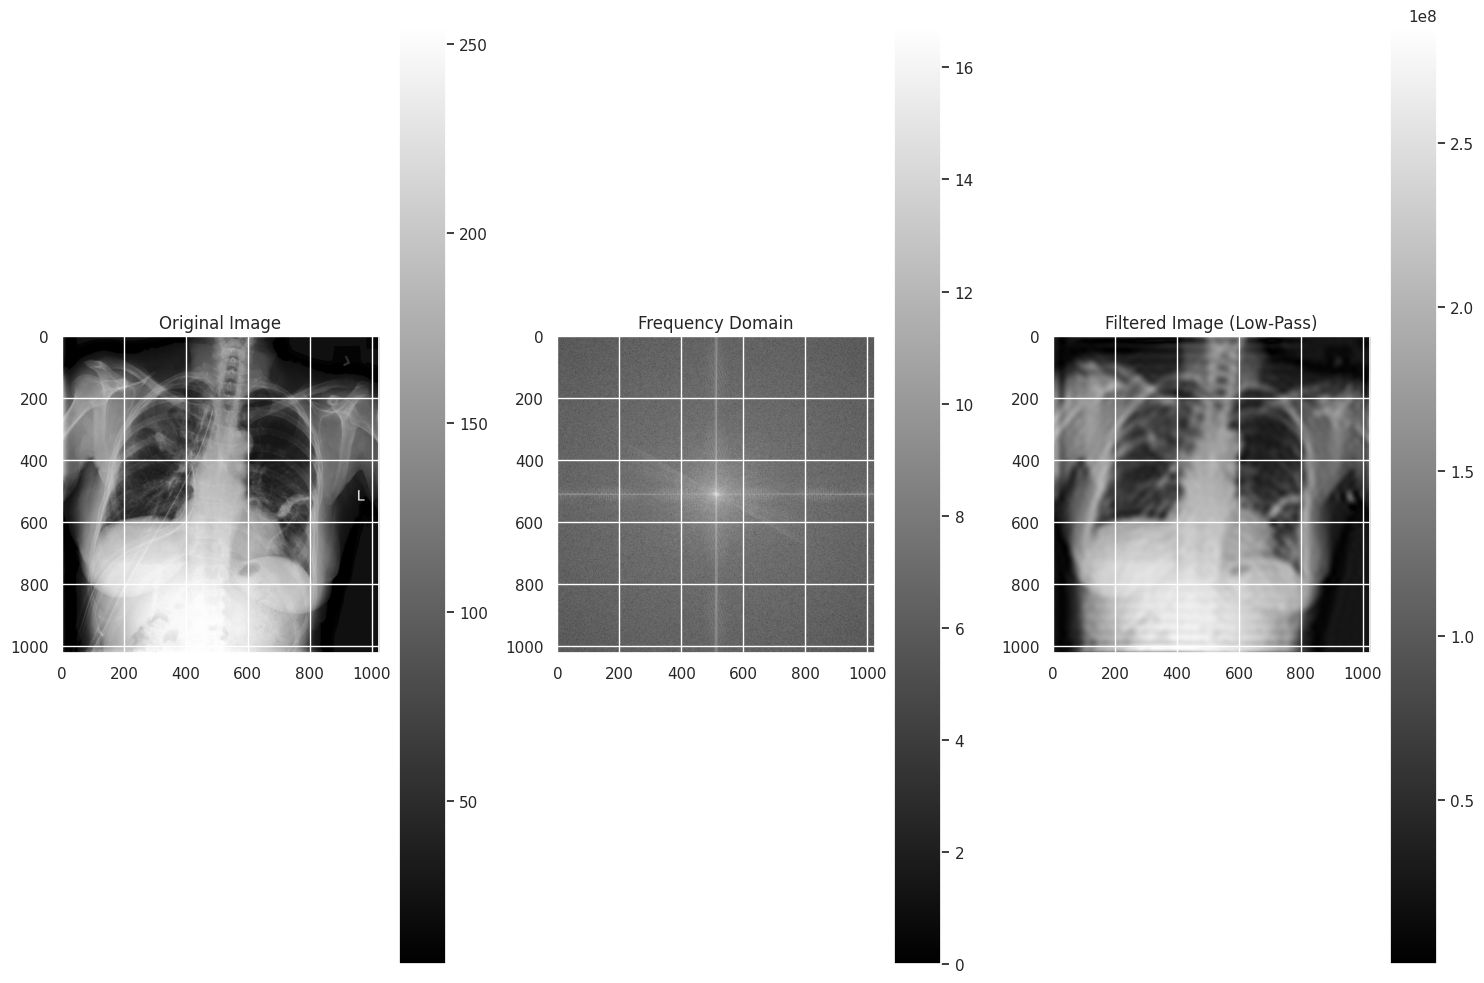

In [44]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

image = gamma_corrected

dft = cv2.dft(np.float32(image), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

rows, cols = image.shape
crow, ccol = rows // 2, cols // 2
mask = np.zeros((rows, cols, 2), np.uint8)
mask[crow-30:crow+30, ccol-30:ccol+30] = 1

fshift = dft_shift * mask
f_ishift = np.fft.ifftshift(fshift)
filtered_image = cv2.idft(f_ishift)
filtered_image = cv2.magnitude(filtered_image[:, :, 0], filtered_image[:, :, 1])

plt.figure(figsize=(15, 10))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.colorbar()

plt.subplot(1, 3, 2)
plt.imshow(np.log(1 + np.abs(dft_shift[:, :, 0])), cmap='gray')
plt.title("Frequency Domain")
plt.colorbar()

plt.subplot(1, 3, 3)
plt.imshow(filtered_image, cmap='gray')
plt.title("Filtered Image (Low-Pass)")
plt.colorbar()

plt.tight_layout()
plt.show()


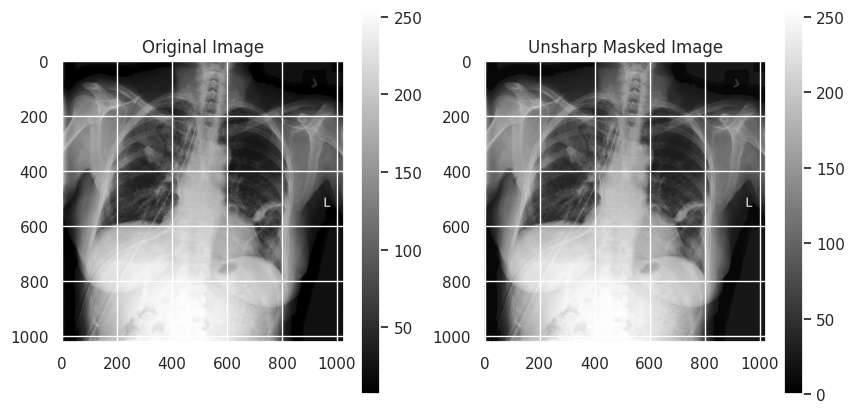

In [45]:
blurred = cv2.GaussianBlur(image, (5, 5), 0)

unsharp_image = cv2.addWeighted(image, 1.5, blurred, -0.5, 0)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.colorbar()
plt.subplot(1, 2, 2)
plt.imshow(unsharp_image, cmap='gray')
plt.title("Unsharp Masked Image")
plt.colorbar()
plt.show()


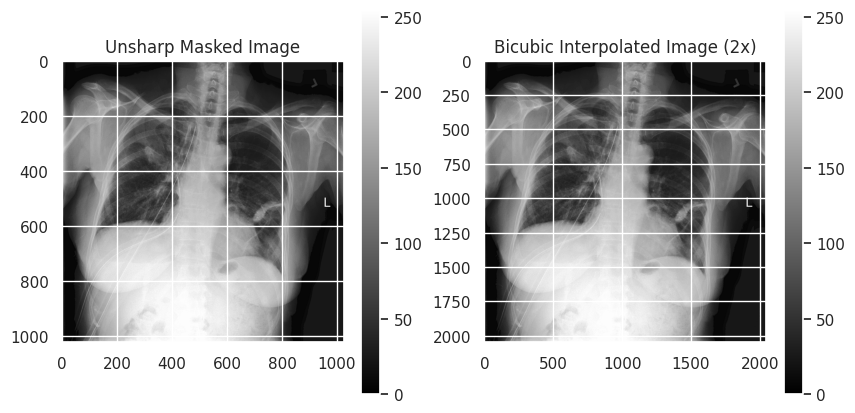

In [46]:
resized_image = cv2.resize(unsharp_image, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(unsharp_image, cmap='gray')
plt.title("Unsharp Masked Image")
plt.colorbar()
plt.subplot(1, 2, 2)
plt.imshow(resized_image, cmap='gray')
plt.title("Bicubic Interpolated Image (2x)")
plt.colorbar()
plt.show()
